In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [14]:
#-------------------------------
# Step 1: Read in and clean data file 
#-------------------------------

# create dataframes to hold the data
city_df = pd.read_csv('data/city_data.csv').dropna()
rides_df = pd.read_csv('data/ride_data.csv').dropna()

# create a merged dataframe, excluding any cities that we don't have complete data on
cityPlusRides_df = city_df.merge(rides_df, on='city', how='left')
cityPlusRides_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [2]:
#-------------------------------
# Step 2: Generate bubble plot 
#-------------------------------

## Total Fares by City Type

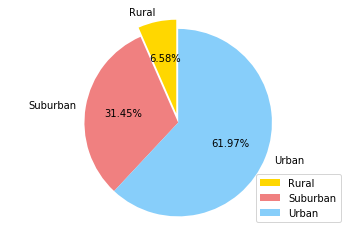

In [119]:
#---------------------------------------------
# Step 3: Generate fare by city type pie chart
#---------------------------------------------

# create dataframe
fareByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['fare'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('equal')
plt.legend(loc='lower right')
plt.show()

## Total Rides by City Type

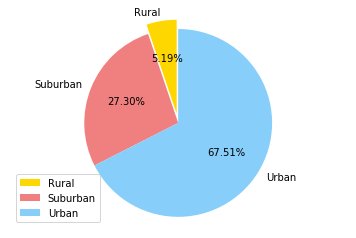

In [127]:
#---------------------------------------------
# Step 4: Generate rides by city type pie chart
#---------------------------------------------
# create dataframe
ridesByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['ride_id'].count())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('equal')
plt.legend(loc='lower left')
plt.show()

In [129]:
## Total Drivers by City Type

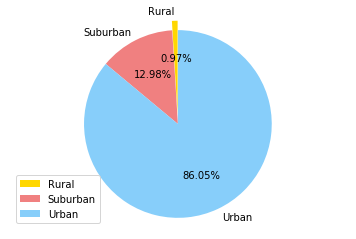

In [128]:
#---------------------------------------------
# Step 5: Generate drivers by city type pie chart
#---------------------------------------------
# create dataframe
driversByCity_df = pd.DataFrame(cityPlusRides_df.groupby(by='type')['driver_count'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [driversByCity_df['driver_count']['Rural']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Suburban']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Urban']/driversByCity_df['driver_count'].sum()]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax1.axis('equal')
plt.legend(loc='lower left')
plt.show()